In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import string

In [8]:
importance_all = pd.read_csv('../../stats/imp_hist_all.csv', index_col=0)
importance_kinematic = pd.read_csv('../../stats/imp_hist_kinematic.csv', index_col=0)

In [9]:
columns_all = list(importance_all.columns.str.replace('_', ' '))
columns_all = [c.title() for c in columns_all]
importance_all.columns = columns_all

columns_kinematic = list(importance_kinematic.columns.str.replace(' ', '_'))
columns_kinematic = [c.lower() for c in columns_kinematic]
importance_kinematic.columns = columns_kinematic

In [502]:
importance_kinematic.to_csv('../../stats/imp_hist_kinematic.csv',  header=True)

In [428]:
set(importance_all.columns)

{'Left Hip Min Ang Vel Sit2Stand',
 'Left Knee Max Mean Stand2Sit',
 'Nummedcond',
 'Pelvic Avg Speed',
 'Right Ankle Max Sd Stand2Sit',
 'Right Hip Max Mean Stand2Sit',
 'Right Hip Min Ang Acc'}

In [10]:
set(importance_kinematic.columns)

{'left_hip_min_ang_vel_sit2stand',
 'left_knee_min_ang_vel_stand2sit',
 'neck_min_y_acc',
 'pelvic_avg_speed',
 'right_ankle_max_sd_stand2sit',
 'right_hip_max_mean',
 'right_hip_max_mean_stand2sit',
 'right_hip_max_stand2sit',
 'right_hip_min_ang_acc',
 'speed',
 'speed_stand2sit',
 'time_diff_sit2stand',
 'time_diff_stand2sit',
 'time_stand2sit'}

In [430]:
set(importance_all.columns).intersection(set(importance_kinematic.columns))

{'Left Hip Min Ang Vel Sit2Stand',
 'Pelvic Avg Speed',
 'Right Ankle Max Sd Stand2Sit',
 'Right Hip Max Mean Stand2Sit',
 'Right Hip Min Ang Acc'}

In [431]:
median = importance_all.median()
median.sort_values(ascending=True, inplace=True)
median

Left Knee Max Mean Stand2Sit      3.318314
Right Ankle Max Sd Stand2Sit      3.789062
Left Hip Min Ang Vel Sit2Stand    4.144971
Right Hip Max Mean Stand2Sit      6.057181
Right Hip Min Ang Acc             6.586845
Pelvic Avg Speed                  6.804651
Nummedcond                        7.217706
dtype: float64

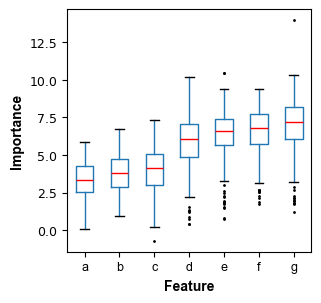

In [131]:
fig, ax = plt.subplots(figsize=(8 / 2.54, 8 / 2.54))  # 8x8 cm figure size
medianprops = dict(color='red', linewidth=1)
flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='black')
importance_all.boxplot(ax = ax, grid=False, vert=True, figsize=(3.15, 3.15), flierprops=flierprops, medianprops=medianprops)
short_names = list('abcdefg'.lower())
plt.xticks(ticks=np.arange(1, 8), labels=short_names, rotation=0, fontsize=9, fontname='Arial')
plt.yticks(fontsize=9)
plt.xlabel('Feature', fontsize=10, fontweight='bold', fontname='Arial')
plt.ylabel('Importance', fontsize=10, fontweight='bold', fontname='Arial')
plt.savefig('../../figures/imp_hist_all.png',dpi = 300, bbox_inches='tight')
plt.show()

In [503]:
def importance_boxplot(filepath, savepath, size = (8 / 2.54, 8 / 2.54)):
    importance = pd.read_csv(filepath, index_col=0)
    columns = list(importance.columns.str.replace('_', ' '))
    columns = [c.title() for c in columns]
    importance.columns = columns
    median = importance.median()
    median.sort_values(ascending=True, inplace=True)
    fig, ax = plt.subplots(figsize=size)  # 8x8 cm figure size
    medianprops = dict(color='red', linewidth=1)
    flierprops = dict(marker='o', markersize=1, linestyle='none', markerfacecolor='black')
    importance.boxplot(ax = ax, grid=False, vert=False, flierprops=flierprops, medianprops=medianprops)
    short_names = list(string.ascii_lowercase[:len(columns)])
    ax.set_xticks(ticks=np.arange(1, len(columns)+1), labels=short_names, rotation=0, fontsize=9, fontname='Arial')
    plt.yticks(fontsize=9)
    ax.set_xlabel('Feature', fontsize=10, fontweight='bold', fontname='Arial')
    ax.set_ylabel('Importance', fontsize=10, fontweight='bold', fontname='Arial')
    #plt.savefig(savepath, dpi = 1000, bbox_inches='tight')
    plt.show()

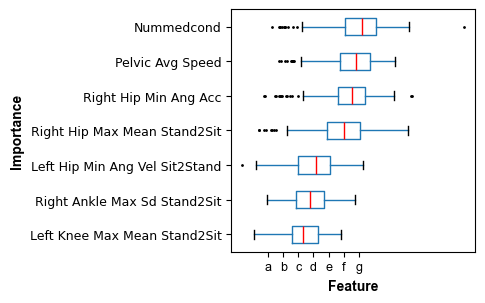

In [155]:
importance_boxplot('../../stats/imp_hist_all.csv', '../../figures/imp_hist_all.png', size = (8 / 2.54, 8 / 2.54))

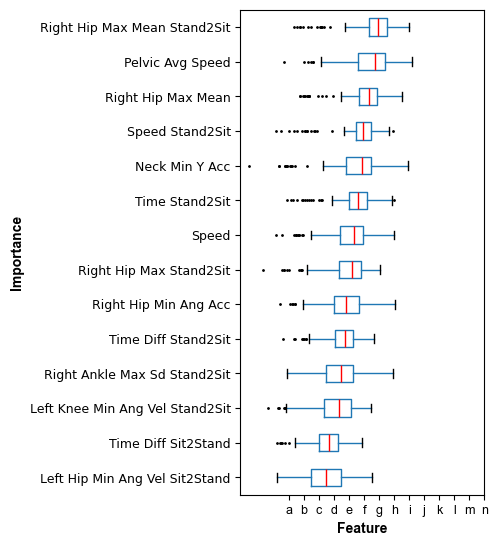

In [504]:
importance_boxplot('../../stats/imp_hist_kinematic.csv', '../../figures/imp_hist_kinematic.png', (8 / 2.54, 16 / 2.54))

In [433]:
median_all = pd.read_csv('../../stats/median_values_all.csv', header=None)
median_kinematic = pd.read_csv('../../stats/median_values_kinematic.csv', header=None)

In [434]:
median_all.head()

,0,1
0,shadowMin,-2.259412
1,left_shank_angle_ang_acc_stand2sit,-1.124072
2,left_hip_ang_acc_stand2sit,-1.001002
3,left_hip_ang_vel,-1.001002
4,left_ankle_min_ang_vel_sit2stand,-1.001002


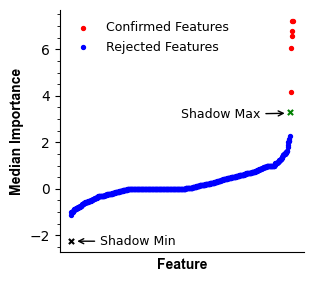

In [570]:
plt.figure(figsize=(8 / 2.54, 8 / 2.54))
plt.scatter(np.arange(599, median_all[1].shape[0]), median_all[1][599:], marker='o', s = 8, color='red', label='Confirmed Features')
plt.scatter(np.arange(1, 597), median_all[1][1:597], marker='o', s = 8, color='blue', label='Rejected Features')
plt.scatter([598], [median_all[1][598]], marker='x', s = 14, color='green')
plt.scatter([0], [median_all[1][0]], marker='x', s = 14, color='black')
plt.xticks([], fontsize=9)
plt.minorticks_on()
plt.xlabel('Feature', fontsize=10, fontweight='bold', fontname='Arial')
plt.ylabel('Median Importance', fontsize=10, fontweight='bold', fontname='Arial')
plt.annotate('Shadow Max',  # Annotation text
             xy=(590, 3.25), # Point to annotate
             xytext=(300, 3.05),  # Position of the text (adjust this as needed)
             arrowprops=dict(facecolor='black', arrowstyle="->"),  # Arrow properties
             fontsize=9)
plt.annotate('Shadow Min',  # Annotation text
             xy=(10, -2.25), # Point to annotate
             xytext=(80, -2.4),  # Position of the text (adjust this as needed)
             arrowprops=dict(facecolor='black', arrowstyle="->"),  # Arrow properties
             fontsize=9)
plt.legend(fontsize=9, frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('../../figures/median_all.png', dpi = 1000, bbox_inches='tight')

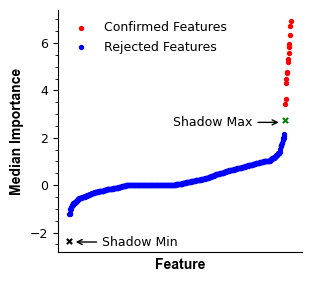

In [568]:
plt.figure(figsize=(8 / 2.54, 8 / 2.54))
plt.scatter(np.arange(519, median_kinematic[1].shape[0]), median_kinematic[1][519:], marker='o', s = 8, color='red', label='Confirmed Features')
plt.scatter(np.arange(1, 518), median_kinematic[1][1:518], marker='o', s = 8, color='blue', label='Rejected Features')
plt.scatter([518], [median_kinematic[1][518]], marker='x', s = 14, color='green')
plt.scatter([0], [median_kinematic[1][0]], marker='x', s = 14, color='black')
plt.xticks([], fontsize=9)
plt.minorticks_on()
plt.yticks(fontsize=9)
plt.xlabel('Feature', fontsize=10, fontweight='bold', fontname='Arial')
plt.ylabel('Median Importance', fontsize=10, fontweight='bold', fontname='Arial')
plt.annotate('Shadow Max',  # Annotation text
             xy=(510, 2.65), # Point to annotate
             xytext=(250, 2.5),  # Position of the text (adjust this as needed)
             arrowprops=dict(facecolor='black', arrowstyle="->"),  # Arrow properties
             fontsize=9)
plt.annotate('Shadow Min',  # Annotation text
             xy=(10, -2.4), # Point to annotate
             xytext=(80, -2.55),  # Position of the text (adjust this as needed)
             arrowprops=dict(facecolor='black', arrowstyle="->"),  # Arrow properties
             fontsize=9)
plt.legend(fontsize=9, frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('../../figures/median_kinematic.png', dpi = 1000, bbox_inches='tight')

In [22]:
final_elastic_net = pd.read_csv('../../stats/final.csv', index_col=0)
final_elastic_net.head()

,Predictor,Selection_Frequency,Average_Coefficient,n_bootstraps
5,speed_sd,1.0,-6.019532,1
7,time_diff_sit2stand,1.0,-1.546337,1
12,time_diff_stand2sit,1.0,0.546537,1
23,left_knee_min_sd,1.0,-0.276292,1
24,left_knee_ang_vel,1.0,0.101349,1


In [55]:
# Pivot the DataFrame to have predictors as rows, n_bootstraps as columns, and both Selection_Frequency and Average_Coefficient
pivot_selection_freq = final_elastic_net.pivot(index='Predictor', columns='n_bootstraps', values='Selection_Frequency')
pivot_avg_coef = final_elastic_net.pivot(index='Predictor', columns='n_bootstraps', values='Average_Coefficient')

# Stack the Selection_Frequency and Average_Coefficient to form the third dimension (axis=2)
# This will result in a 3D array where the shape is (num_predictors, num_n_bootstraps, 2)
combined_array = np.stack([pivot_selection_freq.values, pivot_avg_coef.values], axis=2)

# Get the list of predictor names from the pivot table's index
predictor_names = pivot_selection_freq.index.tolist()

# Create a dictionary where the key is the predictor name and the value is the corresponding array slice
predictor_dict = {predictor_names[i]: combined_array[i, :, :] for i in range(len(predictor_names))}

In [57]:
predictor_dict.keys()

dict_keys(['alignment_ang_acc', 'alignment_ang_acc_sit2stand', 'alignment_ang_acc_stand2sit', 'alignment_ang_vel', 'alignment_ang_vel_sit2stand', 'alignment_ang_vel_stand2sit', 'alignment_max', 'alignment_max_ang_acc', 'alignment_max_ang_acc_sit2stand', 'alignment_max_ang_acc_stand2sit', 'alignment_max_ang_vel', 'alignment_max_ang_vel_sit2stand', 'alignment_max_ang_vel_stand2sit', 'alignment_max_mean', 'alignment_max_mean_sit2stand', 'alignment_max_mean_stand2sit', 'alignment_max_sd', 'alignment_max_sd_sit2stand', 'alignment_max_sd_stand2sit', 'alignment_max_sit2stand', 'alignment_max_stand2sit', 'alignment_min', 'alignment_min_ang_acc', 'alignment_min_ang_acc_sit2stand', 'alignment_min_ang_acc_stand2sit', 'alignment_min_ang_vel', 'alignment_min_ang_vel_sit2stand', 'alignment_min_ang_vel_stand2sit', 'alignment_min_mean', 'alignment_min_mean_sit2stand', 'alignment_min_mean_stand2sit', 'alignment_min_sd', 'alignment_min_sd_sit2stand', 'alignment_min_sd_stand2sit', 'alignment_min_sit2stan

In [11]:
elastic_net_all = pd.read_csv('../../stats/elastic_net_all.csv', index_col=0)
elastic_net_kinematic = pd.read_csv('../../stats/elastic_net_kinematic.csv', index_col=0)
elastic_net_all['Coeff_x_SF'] = elastic_net_all['Average_Coefficient'] * elastic_net_all['Selection_Frequency']
elastic_net_kinematic['Coeff_x_SF'] = elastic_net_kinematic['Average_Coefficient'] * elastic_net_kinematic['Selection_Frequency']

In [15]:
all_sf = elastic_net_all.sort_values(by='Selection_Frequency', ascending=False, inplace=False)
kin_sf = elastic_net_kinematic.sort_values(by='Selection_Frequency', ascending=False, inplace=False)
all_coeff = elastic_net_all.sort_values(by='Average_Coefficient', ascending=False, inplace=False)
kin_coeff = elastic_net_kinematic.sort_values(by='Average_Coefficient', ascending=False, inplace=False)
all_csf = elastic_net_all.sort_values(by='Coeff_x_SF', ascending=False, inplace=False)
kin_csf = elastic_net_kinematic.sort_values(by='Coeff_x_SF', ascending=False, inplace=False)

In [16]:
top_10_all = all_sf.iloc[:10, :]
top_10_kinematic = kin_sf.iloc[:10, :]
bottom_10_all = elastic_net_all.iloc[-10:, :]
bottom_10_kinematic = elastic_net_kinematic.iloc[-10:, :]

In [24]:
selected = {
    'top':{
        'all_sf': all_sf.iloc[:10, :],
        'kin_sf': kin_sf.iloc[:10, :],
        'all_coeff': all_coeff.iloc[:10, :],
        'kin_coeff': kin_coeff.iloc[:10, :],
        'all_csf': all_csf.iloc[:10, :],
        'kin_csf': kin_csf.iloc[:10, :]
    },
    'bottom':{
        'all_coeff': all_coeff.iloc[-10:, :],
        'kin_coeff': kin_coeff.iloc[-10:, :],
        'all_csf': all_csf.iloc[-10:, :],
        'kin_csf': kin_csf.iloc[-10:, :]
    }
}

In [473]:
selected['bottom']['kin_coeff']

,Predictor,Selection_Frequency,Average_Coefficient,Coeff_x_SF
7,time_diff_sit2stand,0.42,-0.099163,-0.041649
512,neck_max_speed_stand2sit,0.12,-0.162410,-0.019489
9,time_sd_sit2stand,0.25,-0.174128,-0.043532
487,neck_min_speed_sit2stand,0.04,-0.260154,-0.010406
514,neck_min_acc_stand2sit,0.29,-0.304636,-0.088344
507,pelvic_avg_y_acc_stand2sit,0.58,-0.435403,-0.252534
483,pelvic_avg_y_acc_sit2stand,0.58,-0.447761,-0.259701
459,pelvic_avg_y_acc,0.58,-0.447861,-0.259760
499,pelvic_min_speed_stand2sit,0.26,-2.351217,-0.611317
5,speed_sd,0.83,-6.816865,-5.657998


In [474]:
top_10_kinematic['Predictor'] = top_10_kinematic['Predictor'].str.replace('_', ' ').str.title()

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_8528\1805427808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_kinematic['Predictor'] = top_10_kinematic['Predictor'].str.replace('_', ' ').str.title()


In [475]:
top_10_all['Predictor'] = ['Concern of Falling 1',
 'Speed Sd',
 'Right Ankle Ang Acc',
 'Right Ankle Ang Vel',
 'Vigourous Activity Time',
 'Walk METs',
 'Walk Time',
 'Meditation',
 'Trunk Lean Min Ang Acc',
 'Number of Medical Conditions']

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_8528\1035006578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_all['Predictor'] = ['Concern of Falling 1',


C:\Users\m93107ma\AppData\Local\Temp\ipykernel_8528\3295437166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_all.sort_values(by='Selection_Frequency', ascending=True, inplace=True)


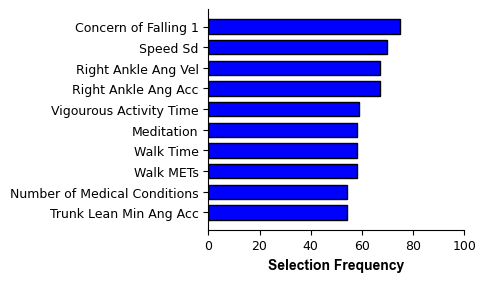

In [586]:
top_10_all.sort_values(by='Selection_Frequency', ascending=True, inplace=True)

# Define the figure and gridspec layout (exclude labels area from size calculation)
fig = plt.figure(figsize=(13/2.54, 8/2.54))  # This sets the total figure size
gs = GridSpec(1, 1, left=0.45, right=0.95, top=0.9, bottom=0.2)  # Manually control plot area size

# Add the bar chart to the axes within the gridspec
ax = fig.add_subplot(gs[0])


# Plotting the barchart
plt.barh(top_10_all['Predictor'], top_10_all['Selection_Frequency']*100, color='blue', edgecolor='black', linewidth=1, height=0.7)
plt.xlabel('Selection Frequency', fontsize=10, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.xlim(0, 100)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('../../figures/top_all_Elastic_Net.png', dpi = 1000, bbox_inches='tight')
plt.show()

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_8528\1225587982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_kinematic.sort_values(by='Selection_Frequency', ascending=True, inplace=True)
C:\Users\m93107ma\AppData\Local\Temp\ipykernel_8528\1225587982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_kinematic['Predictor'] = top_10_kinematic['Predictor'].str.replace('_', ' ').str.title()


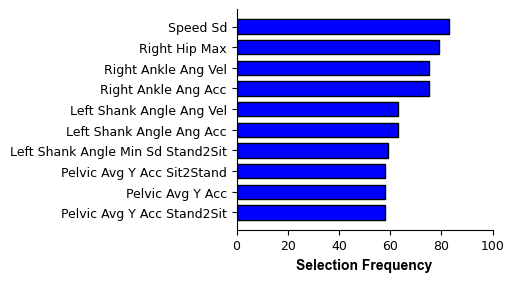

In [588]:
top_10_kinematic.sort_values(by='Selection_Frequency', ascending=True, inplace=True)
top_10_kinematic['Predictor'] = top_10_kinematic['Predictor'].str.replace('_', ' ').str.title()

# Define the figure and gridspec layout (exclude labels area from size calculation)
fig = plt.figure(figsize=(13/2.54, 8/2.54))  # This sets the total figure size
gs = GridSpec(1, 1, left=0.45, right=0.95, top=0.9, bottom=0.2)  # Manually control plot area size

# Add the bar chart to the axes within the gridspec
ax = fig.add_subplot(gs[0])

plt.barh(top_10_kinematic['Predictor'], top_10_kinematic['Selection_Frequency']*100, color='blue', edgecolor='black', linewidth=1, height=0.7)
plt.xlabel('Selection Frequency', fontsize=10, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.xlim(0, 100)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('../../figures/top_all_Kinematic_Net.png', dpi = 1000, bbox_inches='tight')
plt.show()

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_8528\1185137800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_all.sort_values(by='Average_Coefficient', ascending=True, inplace=True)


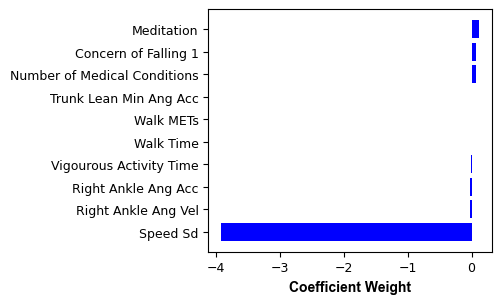

In [591]:
top_10_all.sort_values(by='Average_Coefficient', ascending=True, inplace=True)

# Plotting the barchart
plt.figure(figsize=(13/2.54, 8/2.54))
plt.barh(top_10_all['Predictor'], top_10_all['Average_Coefficient'], color='blue')
plt.xlabel('Coefficient Weight', fontsize=10, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

plt.tight_layout()
# plt.savefig('../../figures/top_all_Elastic_Net.png', dpi = 1000, bbox_inches='tight')
plt.show()

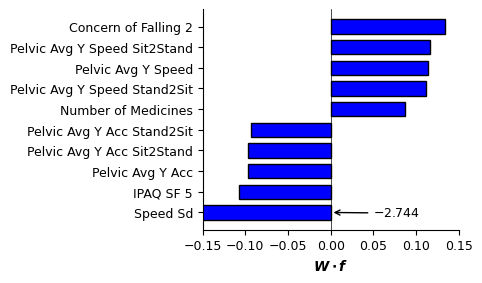

In [589]:
top_all_csf = pd.concat([selected['top']['all_csf'][:5], selected['bottom']['all_csf'][-5:]]).sort_values(by='Coeff_x_SF', ascending=True)
top_all_csf['Predictor'] = ['Speed Sd',
 'IPAQ SF 5',
 'Pelvic Avg Y Acc',
 'Pelvic Avg Y Acc Sit2Stand',
 'Pelvic Avg Y Acc Stand2Sit',
 'Number of Medicines',
 'Pelvic Avg Y Speed Stand2Sit',
 'Pelvic Avg Y Speed',
 'Pelvic Avg Y Speed Sit2Stand',
 'Concern of Falling 2']


# Define the figure and gridspec layout (exclude labels area from size calculation)
fig = plt.figure(figsize=(13/2.54, 8/2.54))  # This sets the total figure size
gs = GridSpec(1, 1, left=0.45, right=0.95, top=0.9, bottom=0.2)  # Manually control plot area size

# Add the bar chart to the axes within the gridspec
ax = fig.add_subplot(gs[0])

plt.barh(top_all_csf['Predictor'], top_all_csf['Coeff_x_SF'], color='blue', edgecolor='black', linewidth=1, height=0.7)
plt.xlabel('$\\boldsymbol{W \cdot f}$', fontsize=10, fontweight='bold', fontname='Arial')
plt.annotate('$-2.744$',  # Annotation text
             xy=(0, 0), # Point to annotate
             xytext=(0.05, -0.2),  # Position of the text (adjust this as needed)
             arrowprops=dict(facecolor='black', arrowstyle="->"),  # Arrow properties
             fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.xlim(-0.15, 0.15)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('../../figures/top_all_csf.png', dpi = 1000, bbox_inches='tight')

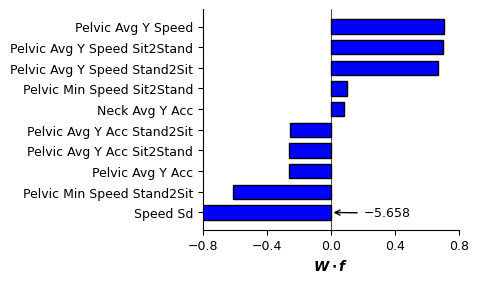

In [590]:
top_kin_csf = pd.concat([selected['top']['kin_csf'][:5], selected['bottom']['kin_csf'][-5:]]).sort_values(by='Coeff_x_SF', ascending=True)

top_kin_csf['Predictor'] = top_kin_csf['Predictor'].str.replace('_', ' ').str.title()

# Define the figure and gridspec layout (exclude labels area from size calculation)
fig = plt.figure(figsize=(13/2.54, 8/2.54))  # This sets the total figure size
gs = GridSpec(1, 1, left=0.45, right=0.95, top=0.9, bottom=0.2)  # Manually control plot area size

# Add the bar chart to the axes within the gridspec
ax = fig.add_subplot(gs[0])

plt.barh(top_kin_csf['Predictor'], top_kin_csf['Coeff_x_SF'], color='blue', edgecolor='black', linewidth=1, height=0.7)
plt.xlabel('$\\boldsymbol{W \cdot f}$', fontsize=10, fontweight='bold', fontname='Arial')
plt.annotate('$-5.658$',  # Annotation text
             xy=(0, 0), # Point to annotate
             xytext=(0.2, -0.2),  # Position of the text (adjust this as needed)
             arrowprops=dict(facecolor='black', arrowstyle="->"),  # Arrow properties
             fontsize=9)
plt.yticks(fontsize=9)
plt.xticks([-0.8,-0.4,0.0, 0.4, 0.8],fontsize=9)
plt.xlim(-0.8, 0.8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.savefig('../../figures/top_kin_csf.png', dpi = 1000, bbox_inches='tight')

In [22]:
np.array(list(top_10_all['Predictor']))

array(['falling_1', 'speed_sd', 'right_ankle_ang_acc',
       'right_ankle_ang_vel', 'vigMins', 'walkMET', 'walkTime',
       'Meditation', 'trunk_lean_min_ang_acc', 'numMedCond'], dtype='<U22')

In [23]:
np.array(list(top_10_kinematic['Predictor']))

array(['speed_sd', 'right_hip_max', 'right_ankle_ang_acc',
       'right_ankle_ang_vel', 'left_shank_angle_ang_acc',
       'left_shank_angle_ang_vel', 'left_shank_angle_min_sd_stand2sit',
       'pelvic_avg_y_acc_stand2sit', 'pelvic_avg_y_acc',
       'pelvic_avg_y_acc_sit2stand'], dtype='<U33')

In [26]:
top_kin_csf = pd.concat([selected['top']['kin_csf'][:5], selected['bottom']['kin_csf'][-5:]]).sort_values(by='Coeff_x_SF', ascending=True)
top_all_csf = pd.concat([selected['top']['all_csf'][:5], selected['bottom']['all_csf'][-5:]]).sort_values(by='Coeff_x_SF', ascending=True)

In [27]:
np.array(list(top_all_csf['Predictor']))

array(['speed_sd', 'IPAQ_SF_5', 'pelvic_avg_y_acc',
       'pelvic_avg_y_acc_sit2stand', 'pelvic_avg_y_acc_stand2sit',
       'numMed_2', 'pelvic_avg_y_speed_stand2sit', 'pelvic_avg_y_speed',
       'pelvic_avg_y_speed_sit2stand', 'falling_2'], dtype='<U28')

In [28]:
np.array(list(top_kin_csf['Predictor']))

array(['speed_sd', 'pelvic_min_speed_stand2sit', 'pelvic_avg_y_acc',
       'pelvic_avg_y_acc_sit2stand', 'pelvic_avg_y_acc_stand2sit',
       'neck_avg_y_acc', 'pelvic_min_speed_sit2stand',
       'pelvic_avg_y_speed_stand2sit', 'pelvic_avg_y_speed_sit2stand',
       'pelvic_avg_y_speed'], dtype='<U28')

In [33]:
params = pd.read_csv('../../stats/selected_params_all_techniques.csv', header=None)
params

,0
0,Number of Medical Conditions
1,Average Pelvic Speed
2,Right Hip Minimum Angular Acceleration
3,Right Hip Max Mean Stand to Sit
4,Left Hip Min Ang Velocity Sit to Stand
5,Right Ankle Max Mean Stand to Sit
6,Left Knee Max Mean Stand to Sit
7,Left Hip Min Angular Velocity Sit to Stand
8,Left Knee Min Angular Velocity Stand to Sit
9,Neck Min Y Acceleration


In [37]:
print(len(params[0]))
print(len(set(params[0])))

41
32


In [40]:
p = list(set(params[0].str.replace(' ', '_')))
p = [x.lower() for x in p]

In [42]:
np.array(p)

array(['left_knee_max_mean_stand_to_sit', 'neck_min_y_acceleration',
       'average_pelvic_speed', 'trunk_lean_min_angular_acceleration',
       'right_ankle_max_sd_stand_to_sit', 'pelvic_min_speed_stand_to_sit',
       'right_hip_max_mean',
       'left_knee_min_angular_velocity_stand_to_sit',
       'concern_of_falling_1', 'time_stand_to_sit', 'meditation',
       'left_hip_min_angular_velocity_sit_to_stand',
       'right_ankle_max_mean_stand_to_sit', 'concern_of_falling_2',
       'pelvic_avg_y_speed',
       'left_shank_angle_min_standard_deviation_stand_to_sit',
       'right_hip_max_mean_stand_to_sit',
       'right_ankle_angular_acceleration', 'pelvic_avg_y_acceleration',
       'vigorous_minutes', 'right_hip_max',
       'right_hip_minimum_angular_acceleration',
       'number_of_medical_conditions',
       'left_shank_angle_angular_acceleration', 'neck_avg_y_acceleration',
       'left_hip_min_ang_velocity_sit_to_stand',
       'speed_standard_deviation', 'walk_time',
      

In [48]:
selected_final = pd.read_csv('../../stats/selected_final.csv', header=None)
np.array(list(selected_final[0]))

array(['left_knee_max_mean_stand2sit', 'neck_min_y_acc',
       'pelvic_avg_speed', 'trunk_lean_min_ang_acc',
       'right_ankle_max_sd_stand2sit', 'left_knee_min_ang_vel_stand2sit',
       'falling_1', 'time_stand2sit', 'Meditation',
       'left_hip_min_ang_vel_sit2stand', 'right_ankle_max_mean_stand2sit',
       'falling_2', 'pelvic_avg_y_speed',
       'left_shank_angle_min_sd_stand2sit', 'right_ankle_ang_acc',
       'pelvic_avg_y_acc', 'vigMins', 'right_hip_max',
       'right_hip_min_ang_acc', 'numMedCond', 'left_shank_angle_ang_acc',
       'neck_avg_y_acc', 'speed_sd', 'walkTime', 'IPAQ_SF_5',
       'pelvic_min_speed_sit2stand'], dtype='<U33')